#Importer les outils

In [0]:
#vecteur et algèbre linéaire
import numpy as np
#les outils pour visualiser
import matplotlib.pyplot as plt
#le solveur
import scipy.integrate as solveur


#Définir les cst du problème

In [0]:

Vdot=10#L/min
Fa0=15#mol*L-1*min-1
Fb0=20#mol*L-1*min-1
Fc0=0#mol*L-1*min-1
Fd0=0#mol*L-1*min-1
Fe0=0#mol*L-1*min-1
Ff0=0#mol*L-1*min-1


#Définir les équations à résoudre

In [0]:
def equations(variables,t, Vdot): 
  Fa ,Fb, Fc, Fd, Fe, Ff = variables
  
  Ca = Fa/Vdot
  Cb = Fb/Vdot
  Cc = Fc/Vdot
  Cd = Fd/Vdot
  Ce = Fe/Vdot
  Cf = Ff/Vdot
  
  r1=0.25*Ca*Cb#mol*L-1*min-1
  r2=0.1*Ca*Cd#mol*L-1*min-1
  r3=5*(Cb**2)*Cc#mol*L-1*min-1
  
  Ra=-r1-3*r2
  Rb=-2*r1-r3
  Rc=r1+r2-2*r3
  Rd=r1-2*r2+r3
  Re=r2
  Rf=r3
  
  dFadV=Ra
  dFbdV=Rb
  dFcdV=Rc
  dFddV=Rd
  dFedV=Re
  dFfdV=Rf
  return dFadV, dFbdV, dFcdV, dFddV, dFedV, dFfdV

#Définir les conditions initiales

In [0]:
conditions_initiales=[Fa0, Fb0, Fc0, Fd0, Fe0, Ff0]

#Résoudre le problème à l'aide du solveur

In [0]:
V = np.arange(0,50,1) #on définit les borne d'intégration
resultats = solveur.odeint(equations, conditions_initiales, V, (Vdot,)) 

On va récupérer les valeurs pour les équations Fa et Fc

In [0]:
Fa=resultats[:,0]
Fc=resultats[:,2]

In [0]:
X=1-((Fa/Vdot)/(Fa0/Vdot))


#Visualiser les résultats

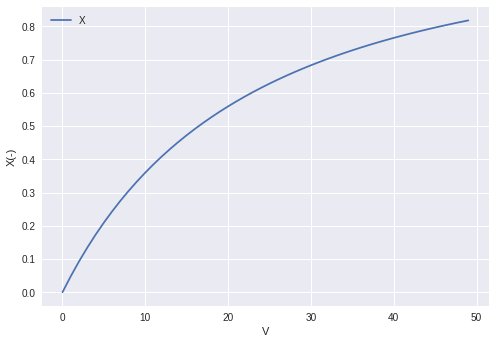

In [56]:
plt.figure(1)
plt.plot(V,X)
plt.xlabel("V")
plt.ylabel("X(-)")
plt.legend(["X"]) #
plt.show()


In [57]:
X[V<50][-1]#taux de conversion lorsque V=50L

0.817780327470462

In [58]:
Cc=Fc[V<50][-1]/Vdot #la concentration de C lorsque le volume est à 50L , mol*l-1
Cc

0.06107795531995793